# Percepción Computacional
## Actividad 1

### Josue Ccerhuayo Ayala

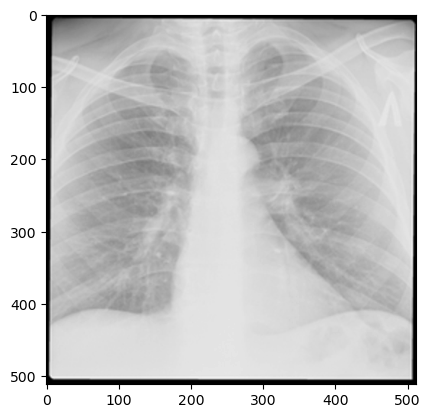

In [47]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# ubicacion de la imagen
imagen1 = cv2.imread('tbc.png',cv2.IMREAD_GRAYSCALE)

plt.imshow(imagen1,cmap="gray")


# Imagen Original

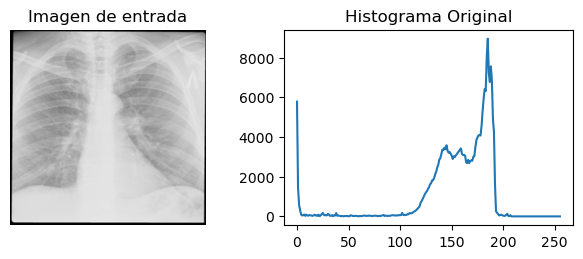

In [28]:
histF = cv2.calcHist([imagen1], [0], None, [256], [0, 256])
x = np.array(range(256))
        
#cv2.imwrite('noche_histograma.jpg', g)
plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(imagen1, cmap = 'gray')
plt.title('Imagen de entrada')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Histograma Original')
plt.plot(x, histF)

plt.tight_layout()
plt.show()


# Histogram equalization

La ecualización de histogramas es un método que aumenta el contraste global de las imágenes, especialmente cuando la imagen está representada por un rango estrecho de valores de intensidad. Con este método, podemos ajustar la intensidad de los píxeles para obtener una mejor distribución en el histograma utilizando el rango completo de intensidades de manera uniforme. Esto permite que las áreas de menor contraste local obtengan un mayor contraste.

Para la radiografía, esto podría ser útil para tener una mejor visión de la estructura ósea en las imágenes de rayos X. Una desventaja de este método es que es indiscriminado. Puede aumentar el contraste del ruido de fondo, mientras disminuye la señal utilizable.

# Umbralización

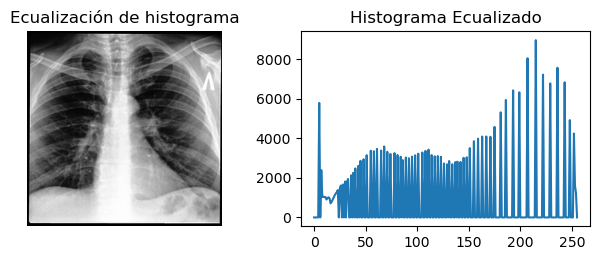

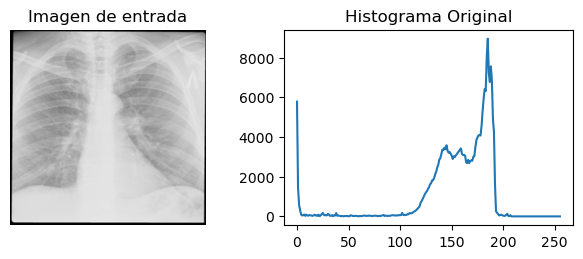

In [52]:

#número de elementos de la imagen, para normalizar
numel = imagen1.size

#histograma normalizado (0 - 1) (divido entre todos los elementos)
histNorm = histF/numel

#suma acumulada del histograma normalizado
##Genera la función de distribución acumulada (cdf por sus siglas en inglés cumulative distribution function)

# cdf = np.sum(histNorm)
cdf = histNorm.cumsum()
cdf = cdf * 255

width, height = imagen1.shape
g = np.zeros((width, height), np.uint8)

#Para entenderlo mejor podemos ir al siguiente link: https://www.datasmarts.net/ecualizacion-de-histograma-con-opencv/

for i in range(width):
    for j in range(height):

        g[i, j] = cdf[imagen1[i, j]]

histG = cv2.calcHist([g], [0], None, [256], [0, 256])

        
#cv2.imwrite('noche_histograma.jpg', g)

plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(g, cmap = 'gray')
plt.axis('off')
plt.title('Ecualización de histograma')
#plt.figure()

plt.subplot(2, 2, 2)
plt.title('Histograma Ecualizado')
plt.plot(x, histG)


plt.tight_layout()
plt.show()

histF = cv2.calcHist([imagen1], [0], None, [256], [0, 256])
x = np.array(range(256))
        
#cv2.imwrite('noche_histograma.jpg', g)
plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(imagen1, cmap = 'gray')
plt.title('Imagen de entrada')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Histograma Original')
plt.plot(x, histF)

plt.tight_layout()
plt.show()


# Umbralización con Thresholding

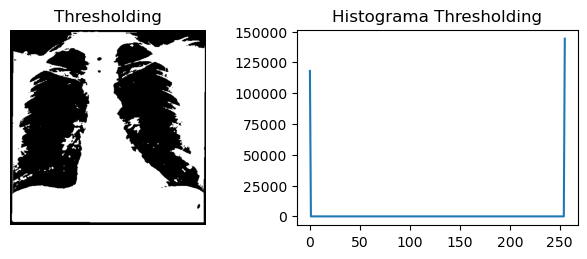

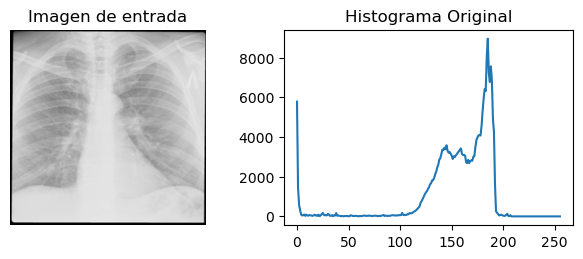

In [57]:
# global thresholding
ret1,th1 = cv2.threshold(imagen1,160,255,cv2.THRESH_BINARY)

hist_th1 = cv2.calcHist([th1], [0], None, [256], [0, 256])
x = np.array(range(256))

plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(th1, cmap = 'gray')
plt.axis('off')
plt.title('Thresholding')

plt.subplot(2, 2, 2)
plt.title('Histograma Thresholding')
plt.plot(x, hist_th1)

plt.tight_layout()
plt.show()

histF = cv2.calcHist([imagen1], [0], None, [256], [0, 256])
x = np.array(range(256))
        
#cv2.imwrite('noche_histograma.jpg', g)
plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(imagen1, cmap = 'gray')
plt.title('Imagen de entrada')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Histograma Original')
plt.plot(x, histF)

plt.tight_layout()
plt.show()


# Umbralización con Thresholding invertido


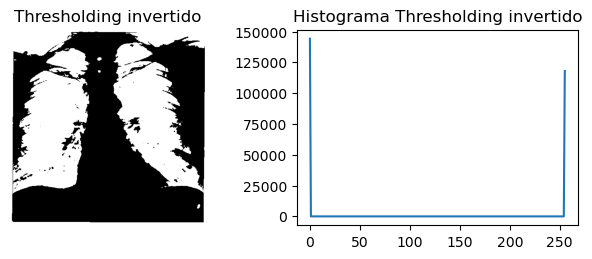

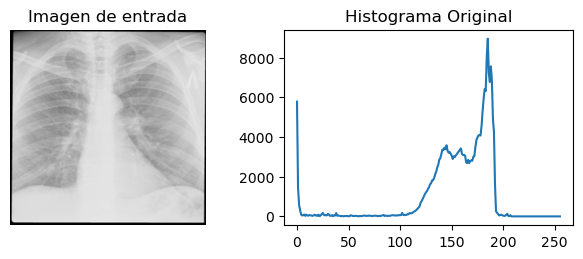

In [56]:
# global thresholding
ret1,th1 = cv2.threshold(imagen1,160,255,cv2.THRESH_BINARY_INV)


hist_th1 = cv2.calcHist([th1], [0], None, [256], [0, 256])
x = np.array(range(256))

plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(th1, cmap = 'gray')
plt.axis('off')
plt.title('Thresholding invertido')

plt.subplot(2, 2, 2)
plt.title('Histograma Thresholding invertido')
plt.plot(x, hist_th1)

plt.tight_layout()
plt.show()

histF = cv2.calcHist([imagen1], [0], None, [256], [0, 256])
x = np.array(range(256))
        
#cv2.imwrite('noche_histograma.jpg', g)
plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(imagen1, cmap = 'gray')
plt.title('Imagen de entrada')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Histograma Original')
plt.plot(x, histF)

plt.tight_layout()
plt.show()


# Pre processing CLAHE

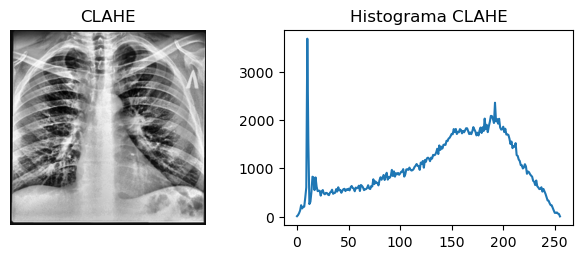

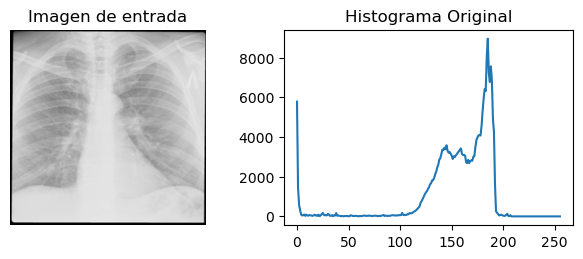

In [88]:

# Resizing the image for compatibility
#image = cv2.resize(image, (500, 600))
 
# The declaration of CLAHE
# clipLimit -> Threshold for contrast limiting

clahe = cv2.createCLAHE(clipLimit = 10) #
final_img_0 = clahe.apply(imagen1) #30


hist_th1 = cv2.calcHist([final_img_0], [0], None, [256], [0, 256])
x = np.array(range(256))

plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(final_img_0, cmap = 'gray')
plt.axis('off')
plt.title('CLAHE')

plt.subplot(2, 2, 2)
plt.title('Histograma CLAHE')
plt.plot(x, hist_th1)

plt.tight_layout()
plt.show()


histF = cv2.calcHist([imagen1], [0], None, [256], [0, 256])
x = np.array(range(256))
        
#cv2.imwrite('noche_histograma.jpg', g)
plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(imagen1, cmap = 'gray')
plt.title('Imagen de entrada')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Histograma Original')
plt.plot(x, histF)

plt.tight_layout()
plt.show()


# Logaritmic transformation

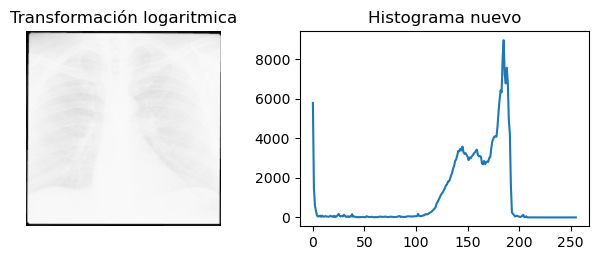

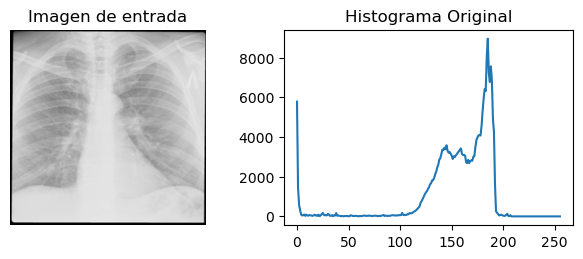

In [54]:
# Apply log transformation method
c = 255 / np.log(1 + np.max(imagen1))
log_image = c * (np.log(imagen1 + 1))
   
# Specify the data type so that
# float value will be converted to int
log_image = np.array(log_image, dtype = np.uint8)

hist_th1 = cv2.calcHist([log_image], [0], None, [256], [0, 256])
x = np.array(range(256))

plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(log_image, cmap = 'gray')
plt.title('Transformación logaritmica')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Histograma nuevo')
plt.plot(x, hist_th1)

plt.tight_layout()
plt.show()

histF = cv2.calcHist([imagen1], [0], None, [256], [0, 256])
x = np.array(range(256))
        
#cv2.imwrite('noche_histograma.jpg', g)
plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(imagen1, cmap = 'gray')
plt.title('Imagen de entrada')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Histograma Original')
plt.plot(x, histF)

plt.tight_layout()
plt.show()


# Sustracción de imágenes

Original size : (344, 354)


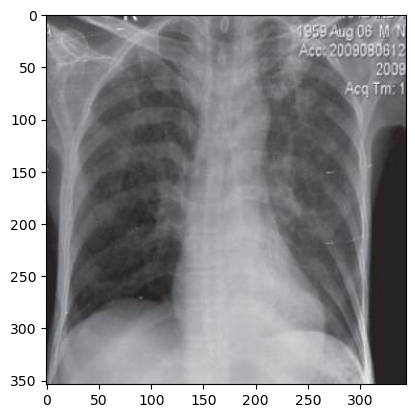

In [80]:
from PIL import Image

image = Image.open('tbc_despues_3.jpg')
print(f"Original size : {image.size}")
plt.imshow(image, cmap = 'gray')

Original size : (344, 354)


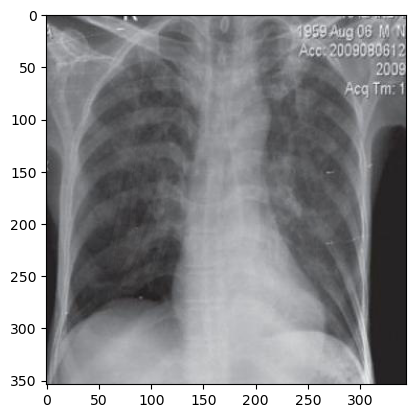

In [81]:
image = Image.open('tbc_despues_2.jpg')
print(f"Original size : {image.size}") 
plt.imshow(image, cmap = 'gray')

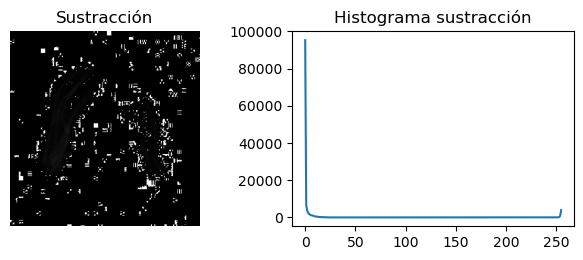

In [77]:
image = Image.open('tbc_despues_3.jpg')

tbc_antes_resized = image.resize((345, 355))
tbc_antes_resized.save('tbc1_345_355.jpeg')

image = Image.open('tbc_despues_2.jpg')

tbc_despues_resized = image.resize((345, 355))
tbc_despues_resized.save('tbc2_345_355.jpeg')

img1 = cv2.imread('tbc1_345_355.jpeg',0)
img2 = cv2.imread('tbc2_345_355.jpeg',0)

img3 = img2-img1

histF = cv2.calcHist([img3], [0], None, [256], [0, 256])
x = np.array(range(256))

plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(img3, cmap = 'gray')
plt.title('Sustracción')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Histograma sustracción')
plt.plot(x, histF)

plt.tight_layout()
plt.show()

# Ejecución de la mejor técnica con 2 imágenes distintas a las anteriores

### Se mostrarán 2 casos:
    - Paciente 1: Enfermo con TBC 
        - Imagen original + Histograma
        - Imagen con CLAHE + Histograma
    - Paciente 2: Sano (Sin TBC)
        - Imagen original + Histograma
        - Imagen con CLAHE + Histograma

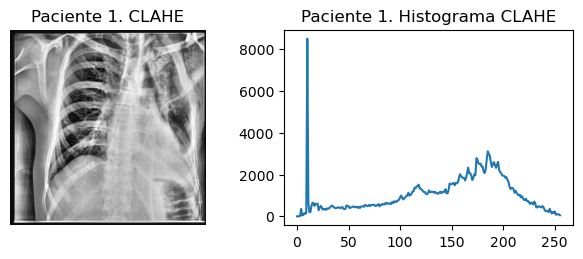

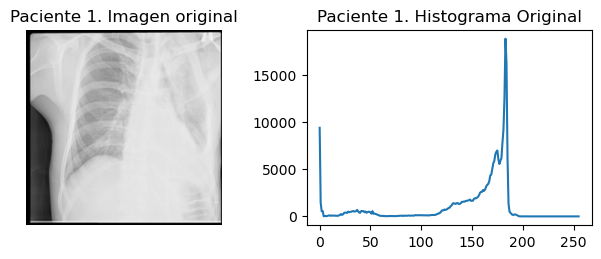

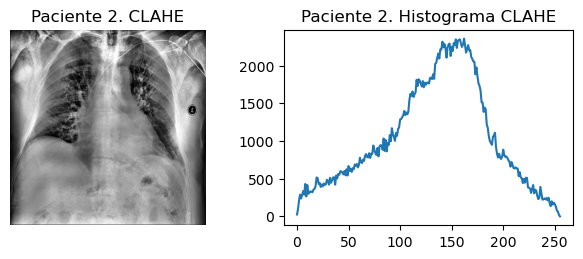

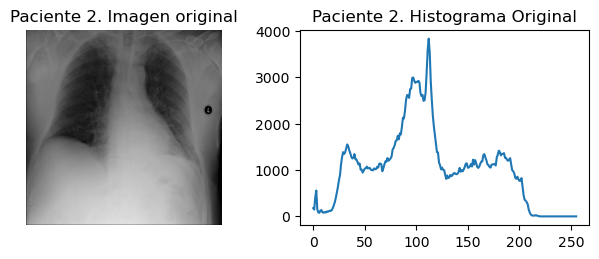

In [93]:

# Se han considerado un data set de imágenes donde previamente se realizó resize, 
# esto no quita que pueda colocarse una imagen de distinto tamaño.

#image = cv2.resize(image, (500, 600))

import cv2
import numpy as np
import matplotlib.pyplot as plt

# ubicacion de la imagen. Paciente 1
img_test1 = cv2.imread('tbc3.png',cv2.IMREAD_GRAYSCALE)

#plt.imshow(imagen2,cmap="gray")

# The declaration of CLAHE
# clipLimit -> Threshold for contrast limiting

clahe = cv2.createCLAHE(clipLimit = 10) #
img_test1_0 = clahe.apply(img_test1) #30


hist_img_test1_0 = cv2.calcHist([img_test1_0], [0], None, [256], [0, 256])
x = np.array(range(256))

plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(final_img_2, cmap = 'gray')
plt.axis('off')
plt.title('Paciente 1 Enfermo. CLAHE')

plt.subplot(2, 2, 2)
plt.title('Paciente 1 Enfermo. Histograma CLAHE')
plt.plot(x, hist_im2)

plt.tight_layout()
plt.show()


hist_img_test1_1 = cv2.calcHist([img_test1], [0], None, [256], [0, 256])
x = np.array(range(256))
        
#cv2.imwrite('noche_histograma.jpg', g)
plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(img_test1, cmap = 'gray')
plt.title('Paciente 1 Enfermo. Imagen original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Paciente 1 Enfermo. Histograma Original')
plt.plot(x, hist_img_test1_1)

plt.tight_layout()
plt.show()

##############################################################################################################

# ubicacion de la imagen. Paciente 2.
img_test2 = cv2.imread('normal3.png',cv2.IMREAD_GRAYSCALE)


clahe = cv2.createCLAHE(clipLimit = 10) #
img_test2_0 = clahe.apply(img_test2) #30


hist_img_test2_0 = cv2.calcHist([img_test2_0], [0], None, [256], [0, 256])
x = np.array(range(256))

plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(img_test2_0, cmap = 'gray')
plt.axis('off')
plt.title('Paciente 2 Sano. CLAHE')

plt.subplot(2, 2, 2)
plt.title('Paciente 2 Sano. Histograma CLAHE')
plt.plot(x, hist_img_test2_0)

plt.tight_layout()
plt.show()


hist_img_test2_1 = cv2.calcHist([img_test2], [0], None, [256], [0, 256])
x = np.array(range(256))
        
#cv2.imwrite('noche_histograma.jpg', g)
plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(img_test2, cmap = 'gray')
plt.title('Paciente 2 Sano. Imagen original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Paciente 2 Sano. Histograma Original')
plt.plot(x, hist_img_test2_1)

plt.tight_layout()
plt.show()